# Fruits Classifier

In [2]:
pip install kaggle

     ---------------------------------------- 0.0/82.7 kB ? eta -:--:--
     ---- ----------------------------------- 10.2/82.7 kB ? eta -:--:--
     ---- ----------------------------------- 10.2/82.7 kB ? eta -:--:--
     ------------------ ------------------- 41.0/82.7 kB 281.8 kB/s eta 0:00:01
     -------------------------------------- 82.7/82.7 kB 464.4 kB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
   ---------------------------------------- 0.0/164.9 kB ? eta -:--:--
   ---------------------- ----------------- 92.2/164.9 kB 5.1 MB/s eta 0:00:01
   ---------------------- ----------------- 92.2/164.9 kB 5.1 MB/s eta 0:00:01
   ---------------------------------------  163.8/164.9 kB 1.2 MB/s eta 0:00:01
   ---------------------------------------- 164.9/164.9 kB 1.1 MB/s eta 0:00:00
  Created wheel for kaggle: filename=kaggle-1.6.17-py3-none-any.whl size=105802 sha256=326c180aae65f8848e29f2034c4f0d74dd39154b95dd

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
conda-repo-cli 1.0.75 requires requests_mock, which is not installed.
anaconda-cloud-auth 0.1.3 requires pydantic<2.0, but you have pydantic 2.6.4 which is incompatible.
conda-repo-cli 1.0.75 requires clyent==1.2.1, but you have clyent 1.2.2 which is incompatible.
conda-repo-cli 1.0.75 requires PyYAML==6.0.1, but you have pyyaml 6.0 which is incompatible.
conda-repo-cli 1.0.75 requires requests==2.31.0, but you have requests 2.28.2 which is incompatible.

[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [84]:
pip install mlflow

   ---------------------------------------- 0.0/27.4 MB ? eta -:--:--
   ---------------------------------------- 0.1/27.4 MB 3.4 MB/s eta 0:00:09
   ---------------------------------------- 0.2/27.4 MB 2.4 MB/s eta 0:00:12
    --------------------------------------- 0.4/27.4 MB 2.5 MB/s eta 0:00:11
    --------------------------------------- 0.5/27.4 MB 2.8 MB/s eta 0:00:10
   - -------------------------------------- 1.0/27.4 MB 4.4 MB/s eta 0:00:07
   -- ------------------------------------- 2.0/27.4 MB 7.1 MB/s eta 0:00:04
   ---- ----------------------------------- 2.9/27.4 MB 8.4 MB/s eta 0:00:03
   ----- ---------------------------------- 3.7/27.4 MB 10.3 MB/s eta 0:00:03
   ----- ---------------------------------- 3.7/27.4 MB 10.3 MB/s eta 0:00:03
   ----- ---------------------------------- 3.7/27.4 MB 10.3 MB/s eta 0:00:03
   ------- -------------------------------- 5.1/27.4 MB 9.6 MB/s eta 0:00:03
   -------- ------------------------------- 5.7/27.4 MB 9.8 MB/s eta 0:00:03
   


[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [1]:
import os
import mlflow
import mlflow.keras
from datetime import datetime
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
from tensorflow.keras.layers import RandomFlip, RandomRotation, RandomZoom
from tensorflow.keras.applications import MobileNet
from tensorflow.keras.utils import plot_model


In [5]:
import zipfile

with zipfile.ZipFile("fruits.zip", 'r') as zip_ref:
    zip_ref.extractall("dataset")

print("Data extracted.")


Data extracted.


# Model Training

In [20]:
# Define hyperparameters and input data
learning_rate = 0.01
num_epochs = 10
batch_size = 32
input_shape = (224, 224, 3)

# Define names for tensorboard logging and mlflow
experiment_name = "fruits-classifier"
run_name = datetime.now().strftime("%Y%m%d_%H%M%S")


In [22]:
original_path_train = r"C:\Users\ayaaa\Downloads\dataset\fruits-360_dataset_original-size\fruits-360-original-size\Training"
original_path_test = r"C:\Users\ayaaa\Downloads\dataset\fruits-360_dataset_original-size\fruits-360-original-size\Test"

In [23]:
# Define names for tensorboard logging and mlflow
experiment_name = "fruits-classifier"
run_name = datetime.now().strftime("%Y%m%d_%H%M%S")

# Load and Split Image Dataset

In [24]:
train_dataset = keras.preprocessing.image_dataset_from_directory(
    original_path_train,
    validation_split=0.2,
    subset="training",
    seed=1337,
    image_size=input_shape[:2],
    batch_size=batch_size,
)

test_dataset = keras.preprocessing.image_dataset_from_directory(
    original_path_test,
    validation_split=0.2,
    subset="validation",
    seed=1337,
    image_size=input_shape[:2],
    batch_size=batch_size,
)


Found 6231 files belonging to 24 classes.
Using 4985 files for training.
Found 3110 files belonging to 24 classes.
Using 622 files for validation.


# Visualize Sample Images with Labels

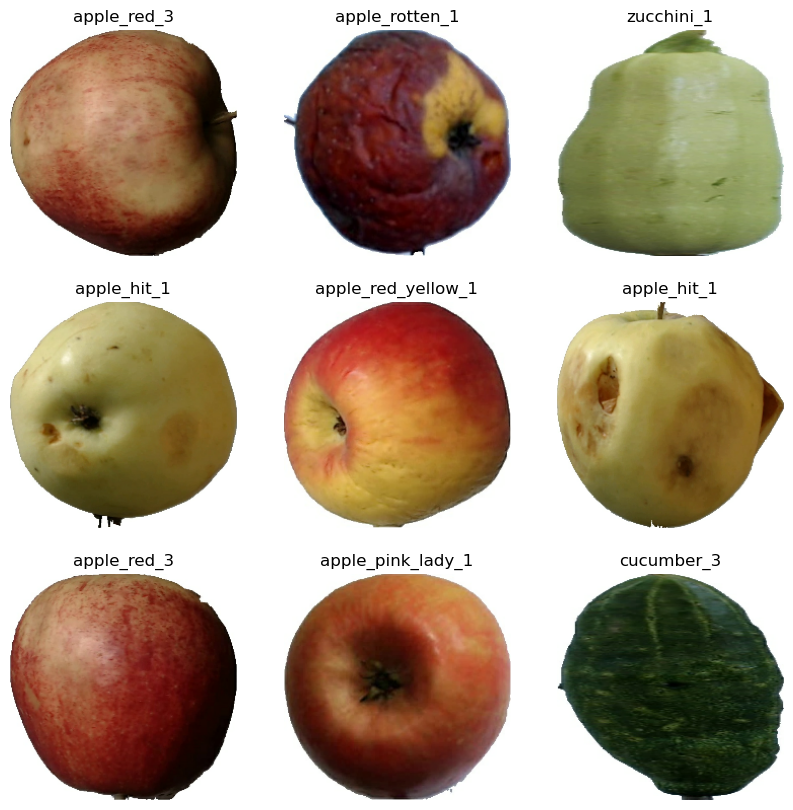

In [25]:
class_names = train_dataset.class_names

plt.figure(figsize=(10, 10))
for images, labels in train_dataset.take(1):
    for i in range(9):
        plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_names[labels[i]])
        plt.axis("off")
plt.show()


In [26]:
data_augmentation = keras.Sequential([
    RandomFlip("horizontal"),
    RandomRotation(0.2),
    RandomZoom(0.2),
])

In [27]:
augmented_train_dataset = train_dataset.map(
    lambda x, y: (data_augmentation(x), y)
)

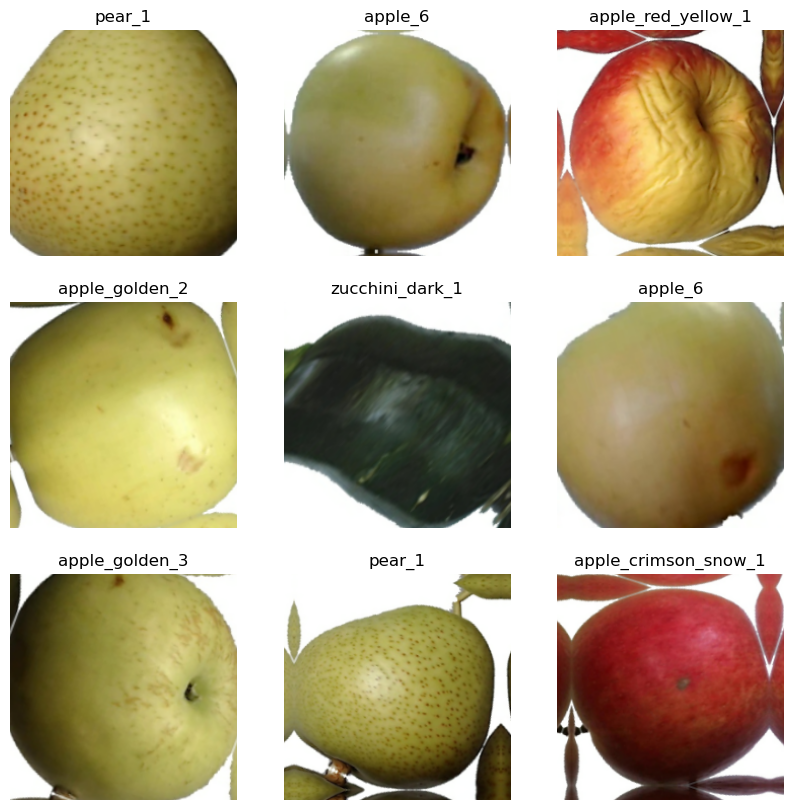

In [28]:
plt.figure(figsize=(10, 10))
for images, labels in augmented_train_dataset.take(1):
    for i in range(9):
        plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_names[labels[i]])
        plt.axis("off")
plt.show()


In [29]:
augmented_train_dataset = train_dataset.map(
    lambda x, y: (data_augmentation(x, training=True), y))

# Define Model and Train


In [30]:
# Define the base model and add a classifier on top
base_model = MobileNet(input_shape=input_shape, include_top=False, weights="imagenet")
base_model.trainable = False

# Define the model
model = keras.Sequential([
    base_model,
    keras.layers.GlobalAveragePooling2D(),
    keras.layers.Dense(128, activation="relu"),
    keras.layers.Dense(len(class_names), activation="softmax") 
])


In [31]:
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ mobilenet_1.00_224 (Functional)      │ (None, 7, 7, 1024)          │       3,228,864 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d_1           │ (None, 1024)                │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 128)                 │         131,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 24)                  │           3,096 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,363,160 (12.83 MB)

 Trainable params: 134,296 (524.59 KB)

 Non-trainable params: 3,228,864 (12.32 MB)

In [32]:
# Compile the model
model.compile(
    optimizer=keras.optimizers.Adam(learning_rate=learning_rate),
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)


In [33]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [34]:
logdir = os.path.join("logs", experiment_name, run_name)
tb_callback = keras.callbacks.TensorBoard(log_dir=logdir, write_graph=True, histogram_freq=1)

In [35]:
history = model.fit(
    augmented_train_dataset,
    epochs=num_epochs,
    validation_data=test_dataset,
    verbose=2,
    callbacks=[tb_callback]
)

Epoch 1/10
156/156 - 168s - 1s/step - accuracy: 0.4835 - loss: 1.6930 - val_accuracy: 0.4566 - val_loss: 1.4197
Epoch 2/10
156/156 - 156s - 1000ms/step - accuracy: 0.7093 - loss: 0.8672 - val_accuracy: 0.6945 - val_loss: 0.8274
Epoch 3/10
156/156 - 158s - 1s/step - accuracy: 0.7809 - loss: 0.6689 - val_accuracy: 0.6640 - val_loss: 0.9276
Epoch 4/10
156/156 - 157s - 1s/step - accuracy: 0.8233 - loss: 0.5320 - val_accuracy: 0.7749 - val_loss: 0.6468
Epoch 5/10
156/156 - 203s - 1s/step - accuracy: 0.8379 - loss: 0.4797 - val_accuracy: 0.7267 - val_loss: 0.7362
Epoch 6/10
156/156 - 156s - 1s/step - accuracy: 0.8429 - loss: 0.4464 - val_accuracy: 0.6447 - val_loss: 0.8856
Epoch 7/10
156/156 - 155s - 996ms/step - accuracy: 0.8632 - loss: 0.3922 - val_accuracy: 0.6913 - val_loss: 0.8452
Epoch 8/10
156/156 - 155s - 995ms/step - accuracy: 0.8710 - loss: 0.3721 - val_accuracy: 0.7556 - val_loss: 0.6517
Epoch 9/10
156/156 - 155s - 995ms/step - accuracy: 0.8714 - loss: 0.3541 - val_accuracy: 0.635

In [110]:
mlflow.set_experiment("Fruits Classifier")
mlflow.set_tracking_uri("http://127.0.0.1:5000/")

with mlflow.start_run(run_name=run_name) as mlflow_run:
    mlflow.set_experiment_tag("base_model", "MobileNet")
    mlflow.set_tag("optimizer", "keras.optimizers.Adam")
    mlflow.set_tag("loss", "sparse_categorical_crossentropy")

    mlflow.keras.log_model(model, "model")

    mlflow.log_param("learning_rate", learning_rate)
    mlflow.log_param("num_epochs", num_epochs)
    mlflow.log_param("batch_size", batch_size)
    mlflow.log_param("input_shape", input_shape)

    mlflow.log_metric("train_loss", history.history["loss"][-1])
    mlflow.log_metric("train_acc", history.history["accuracy"][-1])
    mlflow.log_metric("val_loss", history.history["val_loss"][-1])
    mlflow.log_metric("val_acc", history.history["val_accuracy"][-1])

    mlflow_run_id = mlflow_run.info.run_id
    print("MLFlow Run ID: ", mlflow_run_id)


2025/01/12 19:22:40 INFO mlflow.tracking.fluent: Experiment with name 'Fruits Classifier' does not exist. Creating a new experiment.
2025/01/12 19:22:40 WARNING mlflow.keras.save: You are saving a Keras model without specifying model signature.
2025/01/12 19:22:50 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


MLFlow Run ID:  daf701c9dca5441ea15190df2a38cf4a
🏃 View run 20250112_170258 at: http://127.0.0.1:5000/#/experiments/579385432642734407/runs/daf701c9dca5441ea15190df2a38cf4a
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/579385432642734407


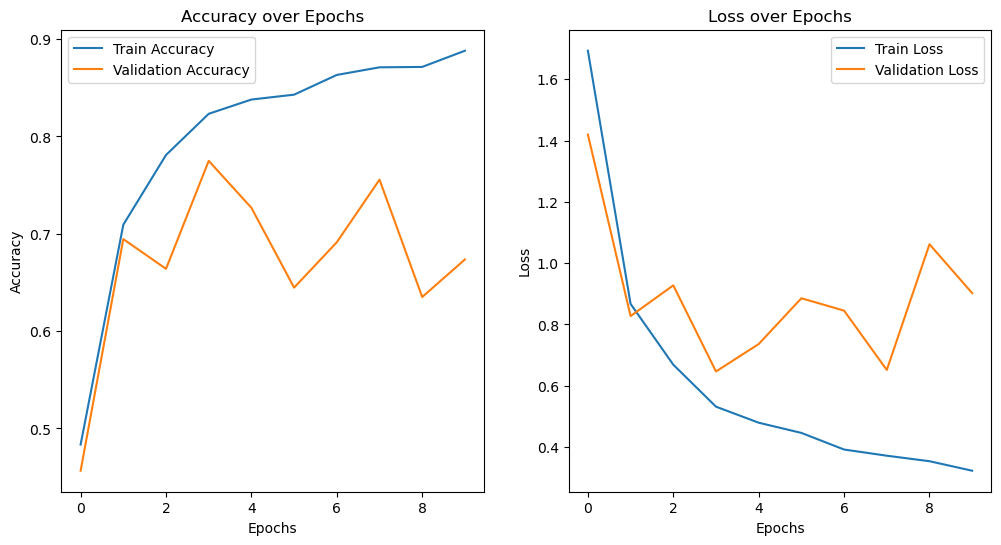

In [109]:
train_accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
train_loss = history.history['loss']
val_loss = history.history['val_loss']

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)  
plt.plot(train_accuracy, label='Train Accuracy')
plt.plot(val_accuracy, label='Validation Accuracy')

plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Accuracy over Epochs')
plt.legend()

plt.subplot(1, 2, 2)  
plt.plot(train_loss, label='Train Loss')
plt.plot(val_loss, label='Validation Loss')

plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss over Epochs')
plt.legend()

plt.show()


# Predictions

In [67]:
image_path = r"C:\Users\ayaaa\Downloads\dataset\fruits-360_dataset_original-size\fruits-360-original-size\Test\apple_golden_2"  # تحديد المسار للصورة
img = keras.preprocessing.image.load_img(
    os.path.join(image_path, "r0_35.jpg"), target_size=input_shape[:2]
)
img_array = keras.preprocessing.image.img_to_array(img)
img_array = tf.expand_dims(img_array, 0)  # إنشاء بعد الباتش

# التنبؤ
predictions = model.predict(img_array)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 729ms/step


In [83]:
image_paths = [
    r"C:\Users\ayaaa\Downloads\dataset\fruits-360_dataset_original-size\fruits-360-original-size\Test\apple_golden_2\r0_35.jpg",
    r"C:\Users\ayaaa\Downloads\dataset\fruits-360_dataset_original-size\fruits-360-original-size\Test\apple_red_1\r0_23.jpg",
    r"C:\Users\ayaaa\Downloads\dataset\fruits-360_dataset_original-size\fruits-360-original-size\Test\pear_1\r0_43.jpg",
    r"C:\Users\ayaaa\Downloads\dataset\fruits-360_dataset_original-size\fruits-360-original-size\Test\zucchini_dark_1\r0_11.jpg",
    r"C:\Users\ayaaa\Downloads\dataset\fruits-360_dataset_original-size\fruits-360-original-size\Test\carrot_1\r0_63.jpg",
    r"C:\Users\ayaaa\Downloads\dataset\fruits-360_dataset_original-size\fruits-360-original-size\Test\cabbage_white_1\r0_35.jpg",
    
    
]

In [85]:
# Logged model in MLFlow
logged_model_path = f"runs:/{mlflow_run_id}/model"

# Load model as a Keras model
loaded_model = mlflow.keras.load_model(logged_model_path)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step


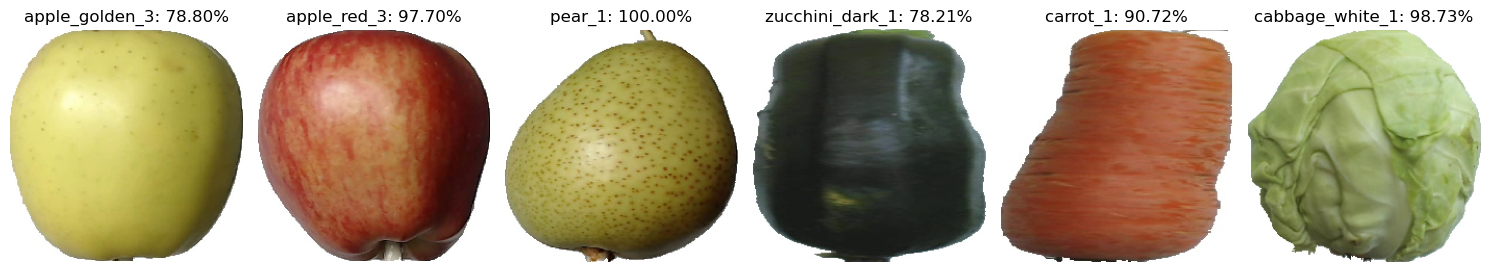

In [86]:
num_images = len(image_paths)
fig, axes = plt.subplots(1, num_images, figsize=(15, 5))

for i, image_path in enumerate(image_paths):
    img = keras.preprocessing.image.load_img(
        os.path.join(image_path), target_size=input_shape[:2]
    )
    img_array = keras.preprocessing.image.img_to_array(img)
    img_array = tf.expand_dims(img_array, 0)  

    predictions = model.predict(img_array)

    predicted_class = tf.argmax(predictions[0]).numpy()

    confidence = 100 * np.max(predictions[0])

    axes[i].imshow(img_array[0].numpy().astype("uint8"))
    axes[i].axis('off')  
    axes[i].set_title(f"{class_names[predicted_class]}: {confidence:.2f}%")

plt.tight_layout() 
plt.show()

# Baseline Calculations

## Random Baseline

In [124]:
true_labels = []
for _, labels in test_dataset:
    true_labels.extend(labels.numpy()) 
    
num_classes = len(class_names)

random_preds = np.random.randint(0, num_classes, size=len(true_labels))

random_baseline_acc = accuracy_score(true_labels, random_preds)
print("Random Baseline Accuracy:", random_baseline_acc)


Random Baseline Accuracy: 0.04823151125401929
